
=== kNN ===
Accuracy: 0.6203
Precision: 0.6379
Recall: 0.6203
F1 Score: 0.6089

=== Decision Tree ===
Accuracy: 0.5063
Precision: 0.4999
Recall: 0.5063
F1 Score: 0.5021


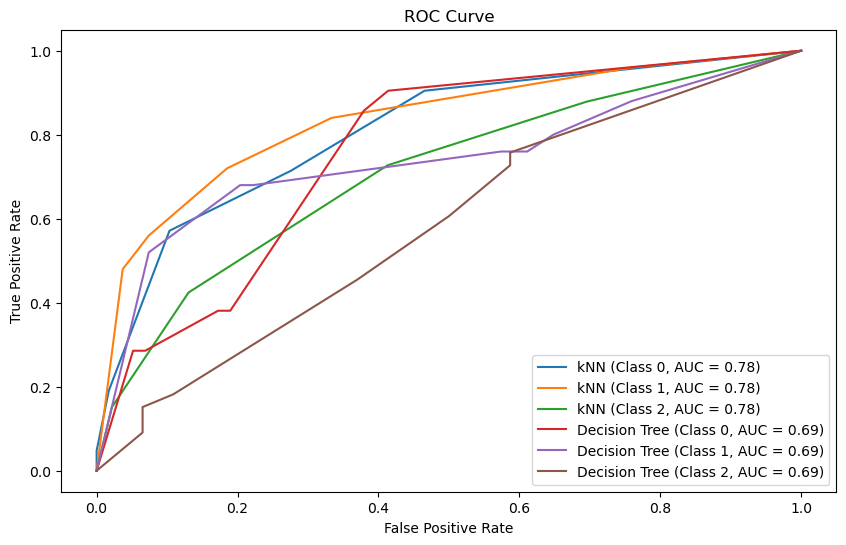


1. kNN:
   - Учитывает ближайших соседей и чувствителен к масштабированию данных.
   - Может быть менее устойчив к шуму.
2. Decision Tree:
   - Легко интерпретируется.
   - Хорошо справляется с нелинейными зависимостями.
3. ROC и AUC:
   - Показали способность моделей разделять классы.



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

file_path = r"C:\Users\masha\Desktop\Automobile.csv"

data = pd.read_csv(file_path)

data = data.dropna()

target = 'acceleration'
features = data.drop(columns=[target])

if data[target].dtype != 'object':
    data[target] = pd.qcut(data[target], q=3, labels=['low', 'medium', 'high'])

encoder = LabelEncoder()
data[target] = encoder.fit_transform(data[target])
for col in features.select_dtypes(include=['object']).columns:
    features[col] = LabelEncoder().fit_transform(features[col])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, data[target], test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")

evaluate_model(y_test, knn_preds, "kNN")

evaluate_model(y_test, dt_preds, "Decision Tree")

def plot_roc_curve(model, X, y_true, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
        fpr = {}
        tpr = {}
        auc_score = {}
        for i in range(len(np.unique(y_true))):
            fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])
            auc_score[i] = roc_auc_score(y_true, y_prob, multi_class='ovr')
            plt.plot(fpr[i], tpr[i], label=f"{model_name} (Class {i}, AUC = {auc_score[i]:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
    else:
        print(f"{model_name} не поддерживает predict_proba, ROC-кривая пропущена.")


plt.figure(figsize=(10, 6))
plot_roc_curve(knn_model, X_test, y_test, "kNN")
plot_roc_curve(dt_model, X_test, y_test, "Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("""
1. kNN:
   - Учитывает ближайших соседей и чувствителен к масштабированию данных.
   - Может быть менее устойчив к шуму.
2. Decision Tree:
   - Легко интерпретируется.
   - Хорошо справляется с нелинейными зависимостями.
3. ROC и AUC:
   - Показали способность моделей разделять классы.
""")
